In [1]:
# import warnings
# warnings.filterwarnings('ignore')
import sys
sys.path.insert(1, r'C:\Users\MattDaykin\PycharmProjects\CNIGuard')
from main import *
from bright_spot_detection import *
from align_and_overlay_ir_vis import *

# Remove sunlight from IR and Vis
### Output files: both called removed_sunlight_img.png. Copy and rename to "removed_sunlight_img_ir.png" and "removed_sunlight_img_vs.png"

Starting...
nb_spots_found 11
average spot size (px): 51.0
Found sunlight! ☼
Removing sunlight...


Found Spots:


<Figure size 640x480 with 0 Axes>

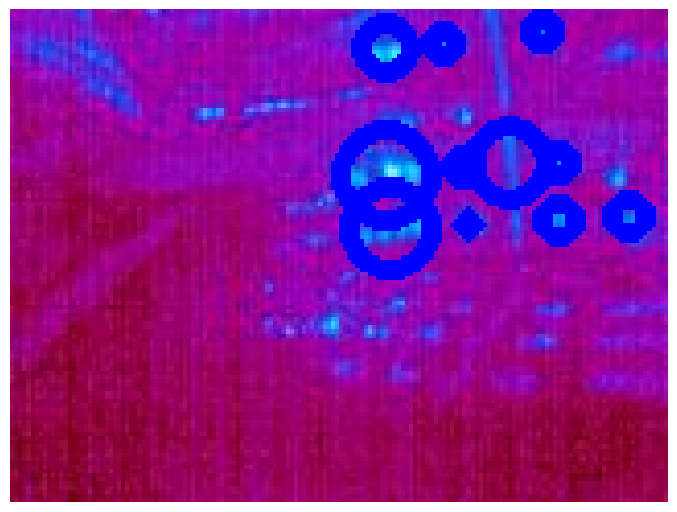

After blurring:


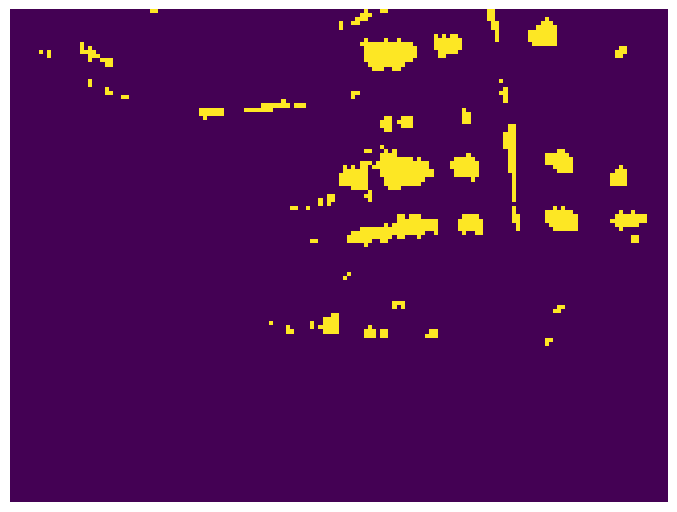

After eroding and dilating:


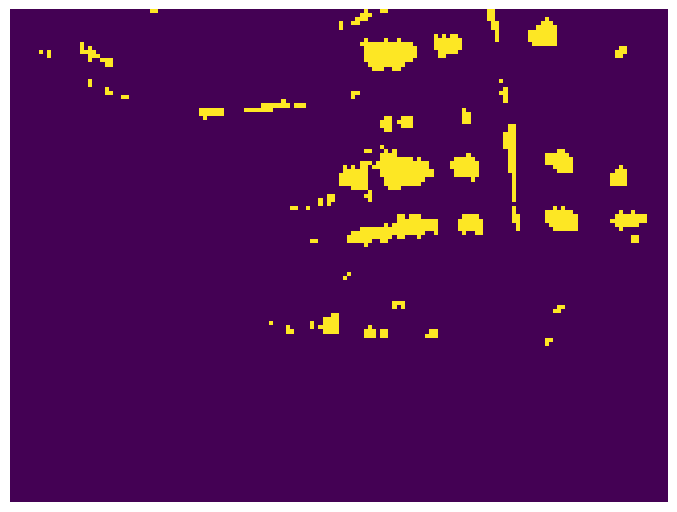

Sunlight removed:


In [2]:
image_1 = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\ir_converted.jpg'
img, step_1_img, step_2_img, image_sun_removed = bright_spot_detection(img=image_1, erode_iterations=0, dilate_iterations=0, nb_pixels_required_for_blob=20, 
                                                    min_threshold_fraction=0.5, max_threshold_fraction=1.0, blur_strength=0)
print("Found Spots:")
plot_img(img)
print("After blurring:")
plot_img(step_1_img)
print("After eroding and dilating:")
plot_img(step_2_img)
print("Sunlight removed:")
plot_img(image_sun_removed)

Starting...
nb_spots_found 30
average spot size (px): 176.0
Found sunlight! ☼
Removing sunlight...


Found Spots:


<Figure size 640x480 with 0 Axes>

After blurring:


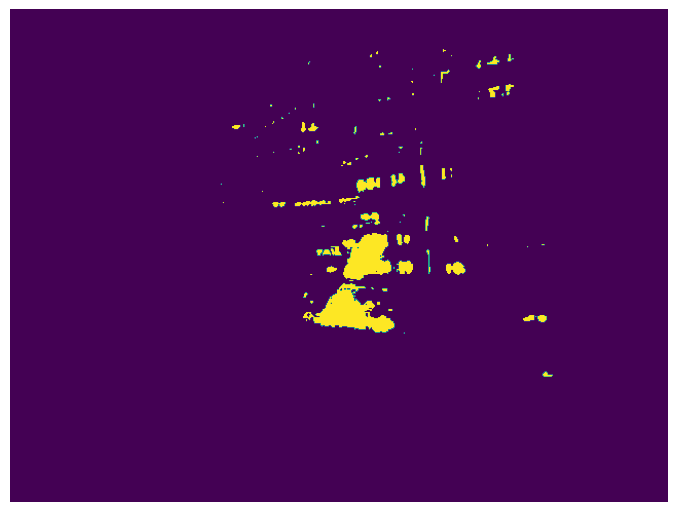

After eroding and dilating:


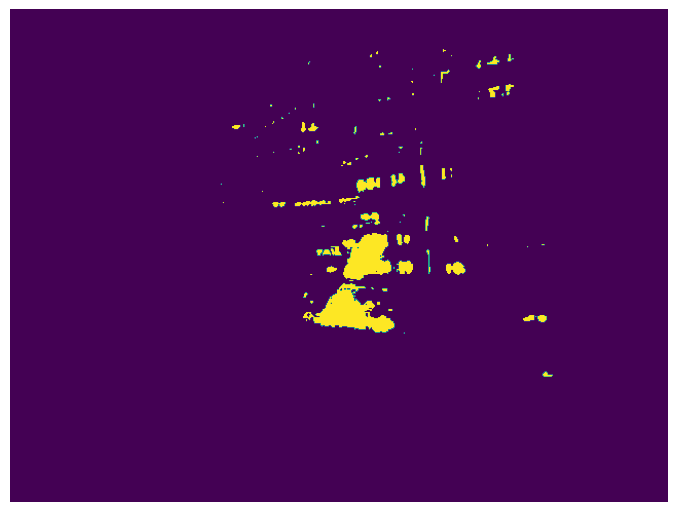

Sunlight removed:


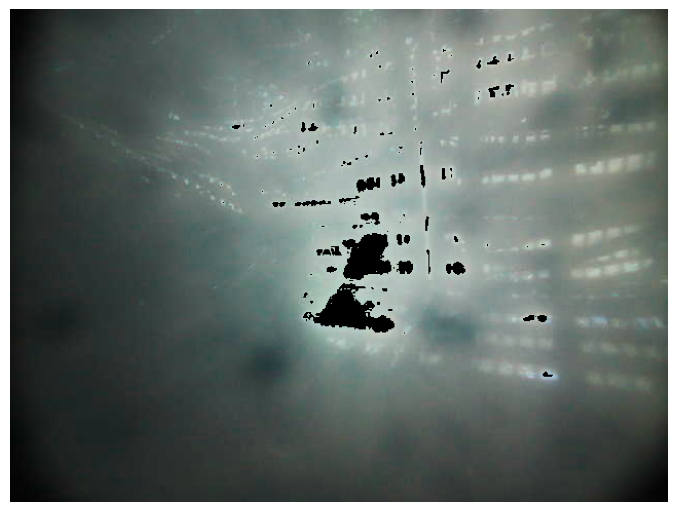

In [3]:
image_1 = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\vs.jpg'
img, step_1_img, step_2_img, image_sun_removed = bright_spot_detection(img=image_1, erode_iterations=0, dilate_iterations=0, nb_pixels_required_for_blob=20, 
                                                    min_threshold_fraction=0.8, max_threshold_fraction=1.0, blur_strength=0)
print("Found Spots:")
plot_img(img)
print("After blurring:")
plot_img(step_1_img)
print("After eroding and dilating:")
plot_img(step_2_img)
print("Sunlight removed:")
plot_img(image_sun_removed)

# Darken VS image
### Output image: darkened-image.png. Rename to "removed_sunlight_img_vs_darkened.png"

In [4]:
vs_img = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\removed_sunlight_img_vs.png'
darken_vis_img(vs_img)

# Add bright alignment spots to original image
## (Do in the images themselves - save as "ir_converted_brighted_big.jpg" and "vs_brighted_big.jpg")

# Align according to these bright spots (don't overlay yet)
### First get alignment points from the brighted_big images

In [5]:
ir_img = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\ir_converted_brighted_big.jpg'
x_array_ir, y_array_ir = alignment_point_detection(ir_img, min_threshold_fraction=0.95, max_threshold_fraction=1.0)

Finding alignment points...
Returning array of coordinates for alignment points.
x_array [45, 60, 76, 85, 105, 106, 117, 119, 121, 126, 129, 138]
y_array [23, 78, 86, 18, 90, 7, 22, 29, 57, 87, 4, 87]


In [6]:
vs_img = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\vs_brighted_big.jpg'
x_array_vs, y_array_vs = alignment_point_detection(vs_img, min_threshold_fraction=0.95, max_threshold_fraction=1.0)

Finding alignment points...
Returning array of coordinates for alignment points.
x_array [253, 285, 302, 334, 368, 380, 401, 403, 406, 418, 428, 447]
y_array [186, 300, 319, 182, 330, 162, 192, 199, 261, 337, 156, 342]


In [7]:
alignment_points_ir = pair_coordinates(x_array_ir, y_array_ir)
alignment_points_vs = pair_coordinates(x_array_vs, y_array_vs)

### Now align the final images using these alignment points
### Saves as aligned.png

In [8]:
vs_img = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\removed_sunlight_img_vs_darkened.png'
ir_img = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\removed_sunlight_img_ir.png'
align_ir(ir_img, vs_img, alignment_points_ir, alignment_points_vs)

array([[ 1.95132081e+00, -5.85946797e-01,  1.69505558e+02],
       [ 7.19502624e-02,  1.56705752e+00,  1.41070347e+02],
       [-9.83318852e-05, -1.26497111e-03,  1.00000000e+00]])

### Also align the raw IR plot. This allows us to find the mask for the overlay later.
### Save as "aligned_original_ir.jpg"

In [9]:
vs_img = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\removed_sunlight_img_vs_darkened.png'
ir_img = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\ir_converted.jpg'
align_ir(ir_img, vs_img, alignment_points_ir, alignment_points_vs)

array([[ 1.95132081e+00, -5.85946797e-01,  1.69505558e+02],
       [ 7.19502624e-02,  1.56705752e+00,  1.41070347e+02],
       [-9.83318852e-05, -1.26497111e-03,  1.00000000e+00]])

# Now transparentise the aligned.jpg image using aligned_original_ir.jpg as the mask for knowing where the border is
### Saves as "aligned_transparent.png"

In [10]:
aligned_ir_img = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\aligned.jpg'
aligned_original_ir_img = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\aligned_original_ir.jpg'
transperentise_aligned_img_background(aligned_ir_img, aligned_original_ir_img)

# Anywhere where either image is black (colour=0), remove from both images.
### Does not remove if the original_ir_aligned image is not black because that is just the border, which we do not want to remove from the visual image.
### Saves as vs_final.png and ir_final.png

In [11]:
vs_sunlight_removed = cv2.imread(r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\removed_sunlight_img_vs.png', cv2.IMREAD_GRAYSCALE)
ir_sunlight_removed = cv2.imread(r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\aligned_transparent.png', cv2.IMREAD_GRAYSCALE)
aligned_original_ir = cv2.imread(r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\aligned_border_added_ir.jpg', cv2.IMREAD_GRAYSCALE)

copy_vs_sunlight_removed = vs_sunlight_removed.copy()
copy_ir_sunlight_removed = ir_sunlight_removed.copy()
# copy_vs_sunlight_removed[ir_sunlight_removed == 0] = 0
# # copy_vs_sunlight_removed[aligned_original_ir == 0] = vs_sunlight_removed
# copy_vs_sunlight_removed[vs_sunlight_removed == 0] = 0

# print("vs_sunlight_removed")
# fig1 = plt.figure(figsize=(x_size_vs, y_size_vs))
# ax = fig1.add_subplot(111)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])
# plt.imshow(vs_sunlight_removed, cmap='gray', vmin=0, vmax=255)
# plt.show()
# plt.draw()

# print("ir_sunlight_removed")
# fig1 = plt.figure(figsize=(x_size_vs, y_size_vs))
# ax = fig1.add_subplot(111)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])
# plt.imshow(ir_sunlight_removed, cmap='gray', vmin=0, vmax=255)
# plt.show()
# plt.draw()

# print("aligned_original_ir")
# fig1 = plt.figure(figsize=(x_size_vs, y_size_vs))
# ax = fig1.add_subplot(111)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])
# plt.imshow(aligned_original_ir, cmap='gray', vmin=0, vmax=255)
# plt.show()
# plt.draw()

# print("copy_vs_sunlight_removed")
# fig1 = plt.figure(figsize=(x_size_vs, y_size_vs))
# ax = fig1.add_subplot(111)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])
# plt.imshow(copy_vs_sunlight_removed, cmap='gray', vmin=0, vmax=255)
# plt.show()
# plt.draw()

print("copy_vs_sunlight_removed", copy_vs_sunlight_removed.shape)
ir_sunlight_removed[copy_vs_sunlight_removed == 0] = 0

# print("ir_sunlight_removed")
# fig1 = plt.figure(figsize=(x_size_vs, y_size_vs))
# ax = fig1.add_subplot(111)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])
# plt.imshow(ir_sunlight_removed, cmap='gray', vmin=0, vmax=255)
# plt.show()
# plt.draw()

print("ir_sunlight_removed", ir_sunlight_removed.shape)
print("vs_sunlight_removed", vs_sunlight_removed.shape)

vs_sunlight_removed[ir_sunlight_removed <= 35] = 0  # Removes the border and sunlight spots.
vs_sunlight_removed = np.where(aligned_original_ir == 0, copy_vs_sunlight_removed, vs_sunlight_removed)  # Puts the border back

mydpi = 120/1.56  # Correction factor
x_size_vs = vs_sunlight_removed.shape[1]/mydpi
y_size_vs = vs_sunlight_removed.shape[0]/mydpi
x_size_ir = ir_sunlight_removed.shape[1]/mydpi
y_size_ir = ir_sunlight_removed.shape[0]/mydpi

fig1 = plt.figure(figsize=(x_size_vs, y_size_vs))
ax = fig1.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.imshow(vs_sunlight_removed, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.draw()
fig1.savefig("vs_final.png", bbox_inches='tight', pad_inches = 0)

fig1 = plt.figure(figsize=(x_size_ir, y_size_ir))
ax = fig1.add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.imshow(ir_sunlight_removed, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.draw()
fig1.savefig("ir_final.png", bbox_inches='tight', pad_inches = 0)

copy_vs_sunlight_removed (480, 640)
ir_sunlight_removed (480, 640)
vs_sunlight_removed (480, 640)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# Finally, overlay the two images above
### Saves as "overlaid-images.png"

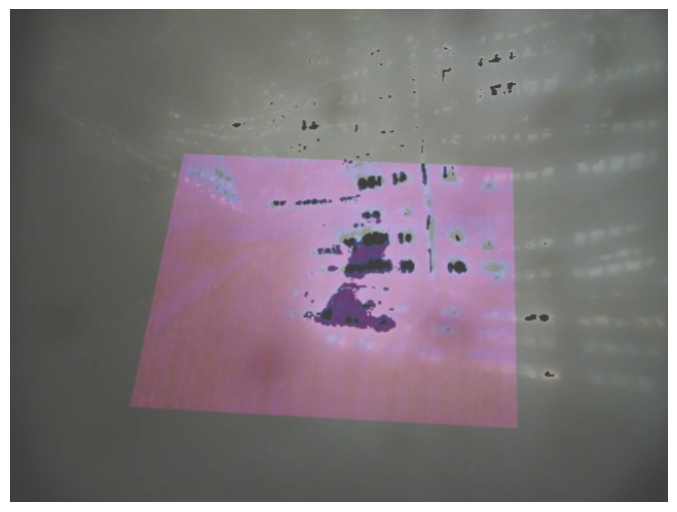

<Figure size 640x480 with 0 Axes>

In [12]:
ir_img = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\aligned_transparent.png'
vs_img = r'C:\Users\MattDaykin\OneDrive - cniguard.com\Documents\Images\bright_spot_detection\Overlay\vs_final.png'
overlay_ir_on_vis(ir_img, vs_img, alpha=1)